# Ch6 - Probability

It's hard to do data science without some sort of understanding of probability and its mathematics. For now, think of **probability** as **a way of quantifying the uncertainty associated with events chosen from a some universe of events**. 

Think of rolling a die. The **universe** consists of all possible outcomes + any **subset** of these outcomes is an **event**; for example, “the die rolls a 1” or “the die rolls an even.”

Notationally, we write **P(E)** = probability of event E. We’ll use probability theory to build models, evaluate models, and more.

One could, were one so inclined, get really deep into the philosophy of what probability theory means

## Dependence and Independence

Roughly speaking, 2 events E and F are **dependent** if knowing something
about whether E happens gives us info about whether F happens (+ vice versa). Otherwise they are independent. If we flip a fair coin twice, knowing whether the 1st is Heads gives no info about whether the 2nd flip is Heads. These events are independent. On the other hand, knowing whether the 1st flip is Heads certainly gives us info about whether *both* flips are Tails. These 2 events are dependent.

Mathematically, we say 2 events E and F are independent if the probability that they *both* happen = the product of the individual probabilities = **`P(E I F) = P(E)P(F)`**. The probability of “1st flip Heads” is 1/2 + the probability of “*both* flips Tails” = 1/4, but the probability of “1st flip Heads and both flips Tails” is 0.

## Conditional Probability

When 2 events E and F are independent, then by definition we have **`P(E I F) = P(E)P(F)`**

If they are NOT necessarily independent (+ if the probability of F != 0), then we define the **probability of E “conditional on F”** as **`P(E|F) = P(E I F)/P(F)`**. Think of this as the probability that E happens, given we know that F happens. We often rewrite this as **`P(E I F) = P(E|F)P(F)`**.

When E and F are independent, you can check that this gives **`P(E|F) = P(E)`**, which is the mathematical way of expressing that knowing F occurred gives us no additional info about whether E occurred.

1 common tricky example involves a family with 2 (unknown) children.
If we assume that:
* Each child is equally likely to be a boy or a girl
* The gender of the 2nd child is independent of the gender of the 1st

then the event “no girls” has probability = 1/4, the event “1 girl, 1 boy” has probability = 1/2, + the event “2 girls” has probability = 1/4. Now we can ask what is the probability of the event “both children are girls” (B) conditional on the event “the older child is a girl” (G)? Using the definition of conditional probability: **`P(B|G) = P(B I G)/P(G) = P(B)/P(G)`** = 1/2, since event "B and G" (both children are girls + older child is a girl) simplifies to event B. (Once you know both are girls, it’s *must* true that the older child is a girl). Most likely this result accords with your intuition.

We could also ask about the probability of the event “both children are girls” conditional on the event “at least 1 child is a girl” (L). Surprisingly, the answer is different from before. As before, event (B and L) (both children are girls + at least 1 is a girl”) is just event B. This means we have: **`P(B|L) = P(B I L)/P(L) = P(B)/P(L)`** = 1/3 

If all you know is that *at least one* child is a girl, then it is twice as likely that the family has 1 boy and 1 girl than that it has both girls.
We can check this by “generating” a lot of families:

In [1]:
import random

def random_kid():
    return random.choice(["boy","girl"])
#print(random_kid)

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(123) # reproducibility
for _ in range(10000): #  "_" = ignoring the specific values
    # generate 2 random children
    younger = random_kid()
    older = random_kid()
    
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print("P(both|older) = P(both Intersect older)/P(older) = P(both)/P(older):"
      ,both_girls/older_girl) # ~1/2
print("P(both|either) = P(both Intersect either)/P(either) = P(both)/P(either):"
      ,both_girls/either_girl) # ~1/3

P(both|older) = P(both Intersect older)/P(older) = P(both)/P(older): 0.493498699739948
P(both|either) = P(both Intersect either)/P(either) = P(both)/P(either): 0.327666356753885


## Bayes’s Theorem

Bayes’s Theorem is a way of “reversing” conditional probabilities. Let’s say we need to know the probability of some event E, conditional on some other event F occurring. But we only have info about the reverse = the probability of F conditional on E occurring. 

Using the definition of conditional probability *twice* tells us that **`P(E|F) = P(E I F)/P(F) = P(F|E)P(E)/P(F)`**

Event F can be split into the 2, **mutually exclusive** events “F and/intersect E” and “F and NOT E.” If we write for --E for “not E” (E doesn’t happen), then **`P(F) = P(F I E) + P(F I NOT E)`** so that
* **`P(E|F) = P(E I F)/P(F) = P(F|E)P(E)/P(F)`**
* **`= P(F|E)P(E)/[P(F|E)P(E) + P(F|NOT E)P(NOT E)]`**,

which is how Bayes’s Theorem is often stated.

This theorem often gets used to demonstrate why data scientists are smarter than doctors.

Imagine a certain disease affects 1 in every 10K people + imagine there is a test for this disease that gives the correct result (“diseased” if you have the disease, “nondiseased” if you don’t) 99% of the time. *What does a positive test mean?* Let’s use `T` for event “positive test” and `D` for event “have disease.” 

Then, Bayes’s Theorem says that the probability that you have the disease, conditional on testing positive, is 
* **`P(D|T) = P(D I T)/P(T) = P(T|D)P(D)/P(T)`**.
* **`= P(T|D)P(D)/[P(T|D)P(D) + P(T I NOT D)P(NOT D)]`**

Here, we know that **`P(T|D)`**, probability someone with the disease tests
positive = 0.99, and that **`P(D)`** (prevalence) = probability any given person has the disease = 1/10000 = 0.0001, and **`P(T I NOT D)`**, probability that someone without the disease tests positive, = 0.01, and **`P(NOT D)`**, probability any given person doesn’t have the disease, = 0.9999. 

If you substitute these numbers into Bayes’s Theorem we find
* **`= .99*.0001 /[.99*.0001 + .01*.9999]` = .0098 = .98%**

That is, < 1% of people who test positive actually have the disease.

* `NOTE`: This assumes people take the test more or less *at random*. If only people with certain symptoms take the test, we would instead have to condition on the event “positive test and symptoms” and the number would likely be a lot higher.

While this is a simple calculation, most doctors will guess that **`P(D|T)`** = ~2. A more intuitive way to see this is to imagine a population of 1M people. You’d expect 100 of them to have the disease, and 99 of those 100 to test positive. On the other hand, you’d expect 999,900 of them NOT to have the disease, and 9,999 of those to test positive. Which means that you’d expect only 99 out of (99 + 9,999) = 10,098 positive testers to *actually* have the disease.

## Random Variables

A **random variable** = a variable whose possible values have an associated probability distribution. 

A very simple random variable = 1 if a coin flip turns up H, + 0 if turns up T. A more complicated one might measure the number of H observed when flipping a coin 10 times or a value picked from `range(10)`, where each value is equally likely.

The associated **distribution** gives the probabilities that the variable **realizes** each of its possible values. The coin flip variable = 0 with p = 0.5 and 1 with p = 0.5. The `range(10)` variable has a distribution that assigns p = 0.1 to each of the numbers from 0 to 9.

We will sometimes talk about **expected value** of a random variable, which = the average of its values, **weighted by their probabilities.** The coin flip variable has an expected value of **(=0 * 1/2 + =1 * 1/2) = 1/2**, and the `range(10)` variable has an expected value of **4.5**

Random variables can be conditioned on events just as other events can. Going back to the 2-child example, if **X** = random variable representing number of girls, X = 0 with p = 1/4, 1 with p = 1/2, and 2 with p = 1/4. We can define a *new* random variable **Y** that gives the number of girls *conditional on at
least 1 child being a girl*. Then Y = 1 with p = 2/3 and = 2 with p = 1/3. 

Then, a variable **Z** that = number of girls conditional on the *older* child
being a girl = 1 with p = 1/2 and = 2 with p = 1/2.

For the most part, we will be using random variables implicitly in what we do without calling special attention to them. But if you look deeply you’ll see them.

## Continuous Distributions

A coin flip corresponds to a **discrete distribution** = associates positive
probability with discrete outcomes. Often we’ll want to model distributions across a **continuum** of outcomes. (For our purposes, these outcomes will always be real numbers, although that’s not always the case IRL).

For example, the **uniform distribution** puts equal weight on ALL numbers between 0 and 1. B/c there're infinitely many numbers between 0-1, this means the weight it assigns to individual points must necessarily be = 0. For this reason, we represent a **continuous distribution** with a **probability density function (PDF)** such that the probability of seeing a value in a certain interval equals the integral of the density function over the
interval (**AUC**)

* *NOTE*: A simpler way of understanding this is that if a distribution DOES have a density function, then the probability of seeing a value between `x` and `x+h` and is approximately `h*f(x)` if `h` is small.

The probability that a random variable following this continuous distribution is between 0.2 and 0.3 = 1/10, as you’d expect. Python’s `random.random()` is a **[pseudo]random variable** with a uniform density.

We will often be more interested in the **cumulative distribution function (CDF)**, which gives the probability a random variable is less than or equal to a certain value. It’s not hard to create the CDF for the uniform distribution:

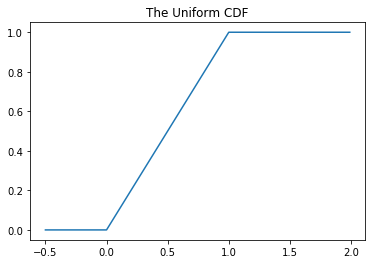

In [2]:
%matplotlib inline

#from collections import Counter
from matplotlib import pyplot as plt

def uniform_cdf(x):
    """Returns probability that a uniform random
    variable X is <= x: P(X <= x)"""
    if x < 0:   return 0 # uniform random variables = never < 0
    elif x < 1: return x # e.g. P(X <= .4) = .4
    else:       return 1 # uniform random variables = always < 1


def plot_uniform_cdf(plt):
    xs = [x/100 for x in list(range(-50,200))]
    plt.plot(xs,[uniform_cdf(x) for x in xs],'-')
    plt.title("The Uniform CDF")
    plt.show()
    
plot_uniform_cdf(plt)

## The Normal Distribution

The normal/**Gaussian** distribution = king of distributions = the classic bell curve–shaped distribution + is completely determined by 2 parameters: its mean = mu (μ) and its SD = sigma (δ). 

μ indicates where the bell is centered + the δ indicates how “wide” it is.
It has the distribution function: **`f(x|μ,δ) = (1/Sqrt[2Piδ])*exp(-((x-μ)^2)/2δ^2)`**, which we can implement as

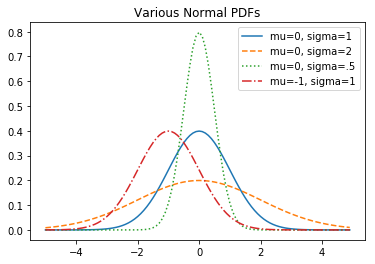

In [3]:
from math import sqrt, pi, exp

def normal_pdf(x,mu=0,sigma=1):
    sqrt_two_pi = sqrt(2*pi)
    return (exp(-(x-mu)**2 / 2 / sigma**2) / (sqrt_two_pi*sigma))

# plot some PDFs
x_ax = [x / 10 for  x in range(-50,50)]
plt.plot(x_ax, [normal_pdf(x,sigma=1) for x in x_ax], linestyle='-'
         ,label="mu=0, sigma=1")
plt.plot(x_ax, [normal_pdf(x,sigma=2) for x in x_ax], linestyle='--'
         ,label="mu=0, sigma=2")
plt.plot(x_ax, [normal_pdf(x,sigma=.5) for x in x_ax], linestyle=':'
         ,label="mu=0, sigma=.5")
plt.plot(x_ax, [normal_pdf(x,mu=-1) for x in x_ax], linestyle='-.'
         ,label="mu=-1, sigma=1")
plt.legend()
plt.title("Various Normal PDFs")
plt.show()

When μ = and δ = 1 == **standard normal distributon**. If **Z** is a standard normal random variable, it turns out that **`X = Zδ + μ`** is also normal but with mean = μ and SD = δ. 

Conversely, if X is a normal random variable with mean = μ and SD = δ, then **`Z = (X - μ)/δ`** is a standard normal variable.

The CDF for the normal distribution cannot be written in an “elementary” manner, but we can write it using Python's `math.erf()` function:

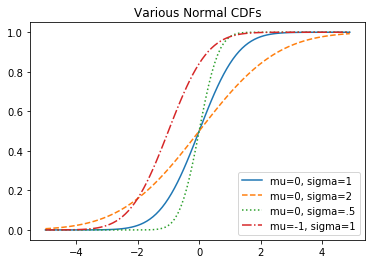

In [4]:
import math

def normal_cdf(x,mu=0,sigma=1):
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

# plot some cDFs
x_ax = [x / 10 for  x in range(-50,50)]
plt.plot(x_ax, [normal_cdf(x,sigma=1) for x in x_ax], linestyle='-'
         ,label="mu=0, sigma=1")
plt.plot(x_ax, [normal_cdf(x,sigma=2) for x in x_ax], linestyle='--'
         ,label="mu=0, sigma=2")
plt.plot(x_ax, [normal_cdf(x,sigma=.5) for x in x_ax], linestyle=':'
         ,label="mu=0, sigma=.5")
plt.plot(x_ax, [normal_cdf(x,mu=-1) for x in x_ax], linestyle='-.'
         ,label="mu=-1, sigma=1")
plt.legend(loc=4) # bottom-right
plt.title("Various Normal CDFs")
plt.show()

Sometimes we’ll need to invert `normal_cdf()` to find the value corresponding to a specified probability. There’s no simple way to compute its inverse, but `normal_cdf `is continuous and strictly increasing, so we can use a **binary search**:

In [5]:
def inverse_normal_cdf(p,mu=0,sigma=1,tolerance=.00001):
    """Find the approximate inverse using binary search"""
    
    # if not standard, standardize and re-scale
    if mu != 0 or sigma != 1:
        return mu + sigma*inverse_normal_cdf(p,tolerance=tolerance)
    
    low_z, low_p = -10.0, 0  # normal_cdf(-10) = very close to 0
    hi_z, hi_p = 10.0, 1     # normal_cdf(10) = very close to 1
    
    while hi_z - low_z > tolerance: 
        mid_z = (low_z + hi_z) / 2 # consider midpoint
        mid_p = normal_cdf(mid_z)  # and the CDF's value there
        
        if mid_p < p:
            # if midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # if midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p 
        else:
            break
    
    return mid_z

inverse_normal_cdf(.25)

-0.6744861602783203

The function repeatedly bisects intervals until it narrows in on a Z that’s close enough to the desired probability.

## The CLT

1 reason the Gaussian distribution is so useful is the CLT, which says (in
essence) that a *random variable* that is *defined as* the *average of a large number of independent and identically distributed (IID) random variables* is, itself, *approximately normally distributed*.

In particular, if are `x1, .., xn` random variables with mean μ and standard deviation δ, and if n is large, then: **`(1/n)(x1, ..., xn)`** is approximately normally distributed with mean μ and standard deviation δ/√n.

Equivalently (but often more usefully), **`((x1, ..., xn) - μn) / δ/√n`** is approximately normally distributed with mean 0 and standard deviation 1.

An easy way to illustrate this is by looking at binomial random variables, which have 2, parameters n and p. A binomial random variable X (**X ~ Binomial(n,p)**) is simply the **sum of n independent Bernoulli(p) random variables**, each of which = 1 with probability p and = 0 with probability (1-p).

In [6]:
import random

def bernoulli_trials(p):
    """p = probability of success"""
    return 1 if random.random() < p else 0

def binomial(n,p):
    """Sum up n, independent Bernoulli random 
    variables with P(success) = p"""
    return sum(bernoulli_trials(p) for _ in range(n))

The mean (**expected value**) of a Bernoulli(p) variable = p, and its standard deviation is √p(1-p). 

The CLT says that **as n gets large, a Binomial(n,p) variable is approximately a
normal random variable with mean `np` and standard deviation `√np(1-p)`**

If we plot both, you can easily see the resemblance

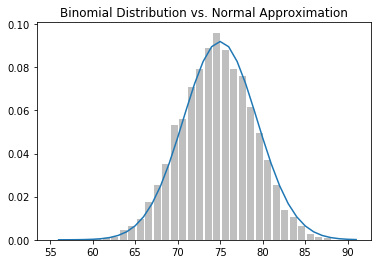

In [7]:
from collections import Counter
import math

def make_hist(p,n,num_points):
    ## get a bunch of binomial random variables
    data = [binomial(n,p) for _ in range(num_points)]
    #print(Counter(data))
    
    ## show the binomial samples (total of num_points)
    # dict of kv-pairs with sum of 100 Bernoulli random 
    #   variables with P(success) = p
    histogram = Counter(data)
    
    ## plot the histogram
    plt.bar([x - .4 for x in histogram.keys()], # center the bars
           [v / num_points for v in histogram.values()], # make proportions (?)
           width=0.8, # of bars
           color='.75') # grey
    #plt.show()
    
    ## calculate Binomial(n,p) variable that becomes approximately a 
    ##   normal random variable with mean np, sigma sqrt(np(1-p))
    ##   as n gets large
    mu = n*p
    sigma = math.sqrt((n*p)*(1-p))
    
    ## Use line chart to show the Gaussian
    x_axis = range(min(data),max(data)+1)
    y_axis = [normal_cdf(i + .5, mu, sigma) - normal_cdf(i - .5, mu, sigma)
              for i in x_axis]
    plt.plot(x_axis,y_axis)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
make_hist(.75, 100, 10000)

The moral of this approximation = if you want to know the probability that (say) a fair coin turns up more than 60 H in 100 flips, you can estimate it as the probability that a **Normal(50,5)** is greater than 60 (**P(Z > 60**), which is easier than computing the Binomial(100,0.5) CDF
* Although in most applications you’d probably be using statistical software that would gladly compute whatever probabilities you want

## More:

* `scipy.stats` contains PDF + CDF functions for most popular probability distributions.
* Intro to Probability = https://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf